# Desafio: Classificação de qualidade de vinho

O desafio final consiste em utilizar um conjunto de dados que contém informações detalhadas sobre várias **características químicas de vinhos** produzidos por uma vinícola no último ano. A qualidade desses vinhos foi avaliada por um painel de especialistas e classificada em três categorias: Ruim, Mediano e Bom.

Agora, sua tarefa é construir um **modelo de classificação multiclasse** capaz de **prever a qualidade dos vinhos** com base nessas características químicas. Isso ajudará a equipe da vinícola a identificar rapidamente os vinhos que precisam de ajustes na produção ou que podem ser destacados como excepcionais.

O dataset está disponível [na seguinte url](https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv).

Para construir este modelo, você precisará realizar as seguintes etapas:

- Ler a URL utilizando a biblioteca pandas e armazenar os dados em uma variável.

- Visualizar o DataFrame para verificar a presença de dados nulos e determinar se é necessário realizar algum pré-processamento.

- Separar as features em uma variável X e a coluna-alvo em uma variável y.

- Dividir os dados em conjuntos de treinamento, validação e teste.

- Treinar o algoritmo de classificação Random Forest utilizando os dados de treinamento.

- Avaliar o desempenho do modelo por meio da matriz de confusão e de um relatório de métricas.

- Avaliar a necessidade de balanceamento dos dados. Caso seja necessário, realizar o balanceamento e treinar o modelo novamente.

- Realizar validação cruzada para garantir a robustez do modelo.

- Testar o modelo com dados de teste que nunca foram previamente observados pelo modelo.

- Este desafio pode parecer abrangente, mas com todo o conhecimento adquirido ao longo do curso, você estará apto(a) a concluí-lo com sucesso!

In [116]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [118]:
df.describe()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [119]:
df['qualidade'].describe()

count        1359
unique          3
top       mediano
freq         1112
Name: qualidade, dtype: object

In [120]:
df.qualidade.value_counts()

mediano    1112
bom         184
ruim         63
Name: qualidade, dtype: int64

A base **não possui valores nulos** e todas as suas features são númericas, exceto a variável alvo, que é string e pode ser de 3 classes: mediano, bom e ruim. Já é possível verificar um **alto desbalanceamento**, com a quantidade de entradas da classe "mediano" sendo muito maior do que as demais.

In [121]:
X_orig = df.drop('qualidade', axis=1)
y_orig = df['qualidade']
X_orig.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [122]:
y_orig

0       mediano
1       mediano
2       mediano
3       mediano
4       mediano
         ...   
1354    mediano
1355    mediano
1356    mediano
1357    mediano
1358    mediano
Name: qualidade, Length: 1359, dtype: object

In [123]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X_orig, y_orig, test_size=.15, stratify=y_orig, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)

**TODO**: fazer o label encoding de y? Se sim, fazer o fit de y_train e depois transformar y_val e y_test.

-> no caso do RandomForestClassifier, essa etapa não parece ser necessária.

Treinamento e avaliação do modelo com o Random Forest e padrões default:

In [124]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

              precision    recall  f1-score   support

         bom       0.60      0.38      0.47        39
     mediano       0.86      0.96      0.90       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.83       289
   macro avg       0.49      0.45      0.46       289
weighted avg       0.78      0.83      0.80       289



c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


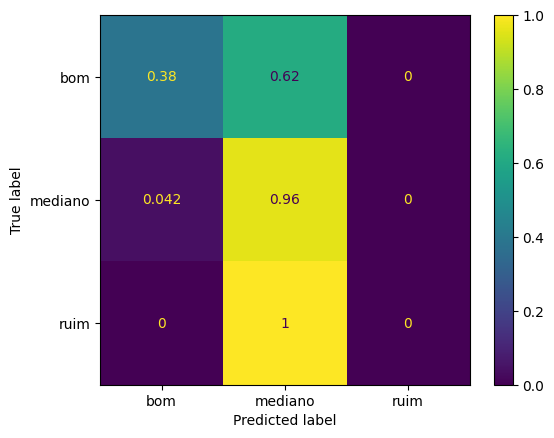

In [125]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true')

In [126]:
pd.DataFrame(y_pred).value_counts()

mediano    264
bom         25
dtype: int64

A quantidade de elementos da classe "ruim" é tão pequena que o modelo treinado **não conseguiu classificar** nenhum elemento de `y_val` como **"ruim"**, o que gerou os warnings `UndefinedMetricWarning` (ocorrência de divisão por zero) ao chamar `classification_report`. Também é possível ver que a quantidade de elementos da classe "bom", embora um pouco maior do que a de "ruim", acabou influenciando em um valor de recall baixo também para essa classe.

Vamos então aplicar um oversampling com o SMOTE.

In [127]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
X_train_bal, y_train_bal = oversampler.fit_resample(X_train, y_train)

In [128]:
print('Dados de treinamento originais\n')
print(y_train.value_counts())
print('\nDados de treinamento balanceados\n')
print(y_train_bal.value_counts())

Dados de treinamento originais

mediano    709
bom        117
ruim        40
Name: qualidade, dtype: int64

Dados de treinamento balanceados

mediano    709
bom        709
ruim       709
Name: qualidade, dtype: int64


Reavaliando o modelo.

              precision    recall  f1-score   support

         bom       0.47      0.69      0.56        39
     mediano       0.91      0.81      0.85       236
        ruim       0.26      0.43      0.32        14

    accuracy                           0.77       289
   macro avg       0.55      0.64      0.58       289
weighted avg       0.82      0.77      0.79       289



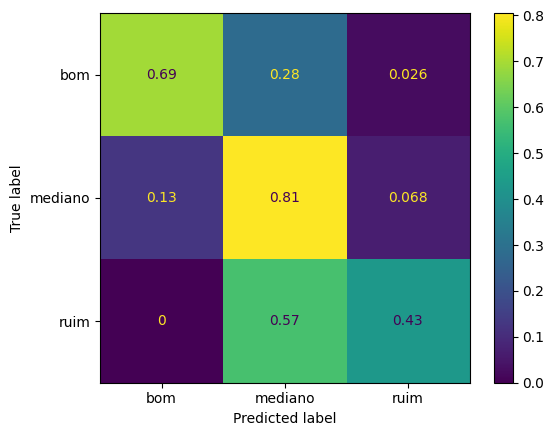

In [129]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_bal, y_train_bal)
y_pred = rfc.predict(X_val)
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true')

O modelo ainda é ruim em classificar vinhos da classe "ruim", classificando 57% deles como mediano.

Vamos criar um pipeline para fazer o oversampling e treinar um modelo de Random Forest, para então realizar a validação cruzada. Vou fazer isso em uma função que recebe max_depth como parâmetro, para conseguir verificar como o modelo se comporta com diferentes podas.

In [130]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

def cross_validate_rfc(max_depth=None):
    rfc = RandomForestClassifier(max_depth=max_depth)
    skf = StratifiedKFold(shuffle=True, random_state=0)
    pipe = imbpipeline([
        ('oversampling', SMOTE(random_state=0)), 
        ('random_forest', rfc)
        ])
    return cross_validate(pipe, X, y, scoring='recall_weighted', cv=skf)

def evaluate_rfc(max_depth=None):
    rfc = RandomForestClassifier(random_state=0, max_depth=max_depth)
    rfc.fit(X_train_bal, y_train_bal)
    y_pred = rfc.predict(X_val)
    print(classification_report(y_val, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true')

In [131]:
cross_validate_rfc()

{'fit_time': array([0.67718077, 0.71274757, 0.67491293, 0.67444372, 0.67689586]),
 'score_time': array([0.00797749, 0.01129103, 0.01020718, 0.0105381 , 0.00951338]),
 'test_score': array([0.78787879, 0.75757576, 0.73160173, 0.77056277, 0.76190476])}

In [132]:
cross_validate_rfc(10)

{'fit_time': array([0.59548783, 0.58678579, 0.57484484, 0.58188105, 0.58478212]),
 'score_time': array([0.00850797, 0.00905943, 0.00851154, 0.010571  , 0.00951481]),
 'test_score': array([0.74891775, 0.76623377, 0.70995671, 0.77056277, 0.75324675])}

              precision    recall  f1-score   support

         bom       0.47      0.69      0.56        39
     mediano       0.91      0.81      0.85       236
        ruim       0.26      0.43      0.32        14

    accuracy                           0.77       289
   macro avg       0.55      0.64      0.58       289
weighted avg       0.82      0.77      0.79       289



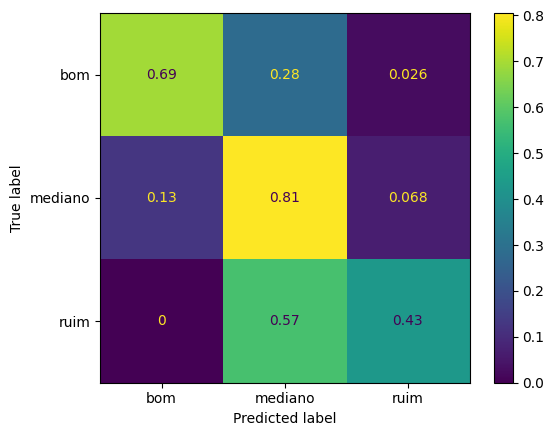

In [133]:
evaluate_rfc()

              precision    recall  f1-score   support

         bom       0.45      0.74      0.56        39
     mediano       0.92      0.75      0.83       236
        ruim       0.23      0.50      0.31        14

    accuracy                           0.74       289
   macro avg       0.53      0.67      0.57       289
weighted avg       0.82      0.74      0.77       289



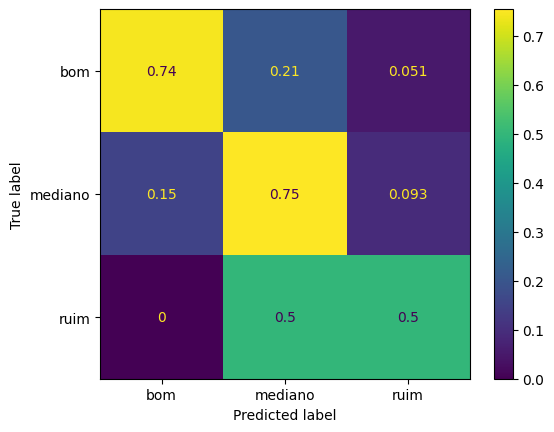

In [134]:
evaluate_rfc(10)

              precision    recall  f1-score   support

         bom       0.36      0.77      0.49        39
     mediano       0.92      0.57      0.70       236
        ruim       0.14      0.57      0.22        14

    accuracy                           0.60       289
   macro avg       0.47      0.64      0.47       289
weighted avg       0.80      0.60      0.65       289



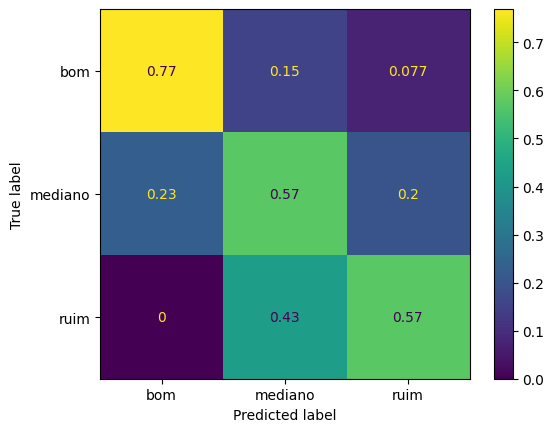

In [135]:
evaluate_rfc(5)

              precision    recall  f1-score   support

         bom       0.39      0.74      0.51        39
     mediano       0.91      0.68      0.78       236
        ruim       0.18      0.50      0.27        14

    accuracy                           0.68       289
   macro avg       0.50      0.64      0.52       289
weighted avg       0.81      0.68      0.72       289



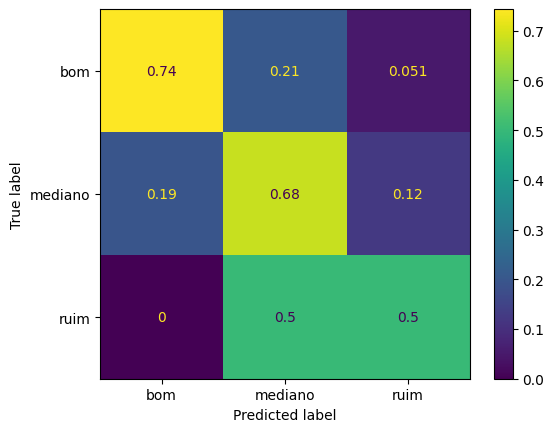

In [136]:
evaluate_rfc(7)

              precision    recall  f1-score   support

         bom       0.46      0.67      0.54        39
     mediano       0.90      0.81      0.85       236
        ruim       0.27      0.43      0.33        14

    accuracy                           0.77       289
   macro avg       0.54      0.63      0.58       289
weighted avg       0.81      0.77      0.79       289



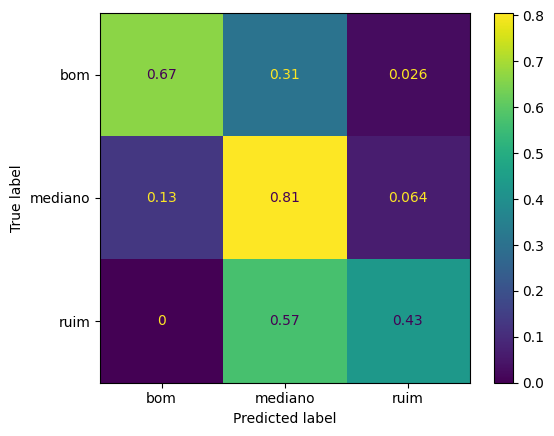

In [137]:
evaluate_rfc(15)

Vou escolher o modelo com `max_depth=5`, que conseguiu prever um pouco melhor os vinhos classificados como "ruim".

In [138]:
cross_validate_rfc(max_depth=5)

{'fit_time': array([0.39696956, 0.36809278, 0.37317395, 0.3673768 , 0.3704772 ]),
 'score_time': array([0.00798988, 0.00851059, 0.00800133, 0.00853682, 0.00751376]),
 'test_score': array([0.68831169, 0.65800866, 0.61471861, 0.68398268, 0.64069264])}

              precision    recall  f1-score   support

         bom       0.47      0.86      0.61        28
     mediano       0.95      0.74      0.83       167
        ruim       0.22      0.56      0.31         9

    accuracy                           0.75       204
   macro avg       0.54      0.72      0.58       204
weighted avg       0.85      0.75      0.78       204



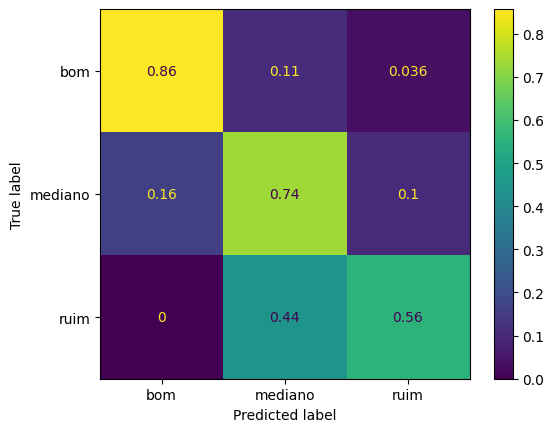

In [139]:
X_bal, y_bal = oversampler.fit_resample(X, y)
rfc = RandomForestClassifier(random_state=0, max_depth=5)
rfc.fit(X_bal, y_bal)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

O modelo escolhido se mostra ir bem em identificar os vinhos classificados como "bom" e "mediano", se saindo de maneira regular ao prever vinhos classificados como "ruim". No entanto, quando ele erra na classificação de um vinho "ruim", a previsão é classificá-lo como "mediano", o que é melhor do que classificá-lo como "bom".